# Working on analysis part of topic modeling

- keyword data

There are couple of pickle files extract from other work

- 1)-patent_firm_full_clean.pkl extracted from File1-Firm_Preprocessing
- 2)-eda.pkl extracted from File2-EDA
- 3)-work_on_data extracted from File3-Topic modeling

- Finally, we will create a pkl file from this as well for future use in visualizations. tech_type_per_topic.pkl

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [4]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [6]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [7]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [8]:
import pickle

In [9]:
p_firm = pd.read_pickle('patent_firm_full_clean.pkl')
p_firm.shape

(68764, 35)

In [10]:
patent = pd.read_pickle('eda.pkl')
patent.shape

(68762, 38)

In [11]:
patent.head(2)

,Unnamed: 0,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,...,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date,year
0,0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,...,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
1,1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,...,52393850\r\n16916549\r\n54353461\r\n48212422\r...,27071024\r\n1239277\r\n25508001\r\n22545199\r\...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990


In [14]:
data_work = pd.read_pickle('work_on_data.pkl')
data_work.shape

(68762, 7)

In [15]:
data = pd.read_pickle('top08_topic_dominant.pkl')
data.shape

(68762, 5)

### select useful features only

In [16]:
data.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.8586,"charge, battery, power, voltage, electric, mod...","[electrical, energy, system, include, electric..."
1,1,2.0,0.8034,"charge, battery, power, voltage, electric, mod...","[electrical, energy, system, include, electric..."


**Create a dataframe for working on paper**

In [17]:
work_on_paper=data
work_on_paper.drop(['Text','Document_No'], axis=1, inplace=True)

In [18]:
work_on_paper['Assignee']=patent.assignee
work_on_paper['Year']=patent.year
work_on_paper['Abstract']=patent.appln_abstr

In [19]:
work_on_paper.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract
0,2.0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,2.0,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,5.0,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...
3,5.0,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...
4,5.0,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...


In [20]:
work_on_paper['Topic']=work_on_paper.Dominant_Topic.map({0:'topic1', 1:'topic2',2 :'topic3',3:'topic4', 4: 'topic5',
                                                         5 : 'topic6', 6: 'topic7', 7:'topic8'})

In [21]:
work_on_paper.Topic.value_counts()

topic4    16775
topic3    14176
topic6     9717
topic2     9127
topic8     8172
topic5     5822
topic7     3783
topic1     1190
Name: Topic, dtype: int64

In [22]:
work_on_paper.Dominant_Topic.value_counts()

3.0    16775
2.0    14176
5.0     9717
1.0     9127
7.0     8172
4.0     5822
6.0     3783
0.0     1190
Name: Dominant_Topic, dtype: int64

In [23]:
work_on_paper.drop(['Dominant_Topic'], axis=1, inplace=True)

In [24]:
work_on_paper.head(2)

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3


In [25]:
work_on_paper.to_pickle('work_on_paper.pkl')

# 1)- Pre-Model work

using eda.pkl and patent_firm_full_clean.pkl

In [26]:
p=patent

In [27]:
total_patents=p['assignee'].value_counts()

In [28]:
normal_patents=p['assignee'].value_counts(normalize=True)

In [29]:
df = pd.DataFrame({'Assigne': total_patents,
...                    'Commulative': normal_patents})

In [30]:
df.head(20)

,Assigne,Commulative
toyota motor corp,8125,0.119041
honda motor co ltd,3977,0.058268
nissan motor co ltd,2885,0.042269
bosch corp,2770,0.040584
hyundai motor co ltd,2597,0.038049
ford global technologies inc,1813,0.026563
mitsubishi motors corp,1412,0.020687
denso corp,1097,0.016072
renault sas,859,0.012585
hitachi ltd,759,0.011120


**That was our table 1: Top assignee of patents**

### Alternative method of doing this

In [31]:
p['assignee'].value_counts().head()

toyota motor corp       8125
honda motor co ltd      3977
nissan motor co ltd     2885
bosch corp              2770
hyundai motor co ltd    2597
Name: assignee, dtype: int64

In [32]:
assigne_data=p['assignee'].value_counts()

In [33]:
df_assigne= pd.DataFrame(data=assigne_data)

In [34]:
df_assigne.head(2)

,assignee
toyota motor corp,8125
honda motor co ltd,3977


In [35]:
df_assigne['Commulative']=p['assignee'].value_counts(normalize=True)

In [36]:
df_assigne.head(2)

,assignee,Commulative
toyota motor corp,8125,0.119041
honda motor co ltd,3977,0.058268


### Alternative way 2

In [37]:
value_counts = p['assignee'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('Top Companies').reset_index(name='patent-counts')
df_val_counts = pd.DataFrame(data)
df_val_counts[:30]

,Top Companies,patent-counts
0,toyota motor corp,8125
1,honda motor co ltd,3977
2,nissan motor co ltd,2885
3,bosch corp,2770
4,hyundai motor co ltd,2597
5,ford global technologies inc,1813
6,mitsubishi motors corp,1412
7,denso corp,1097
8,renault sas,859
9,hitachi ltd,759


In [38]:
df.Commulative[:5]

toyota motor corp       0.119041
honda motor co ltd      0.058268
nissan motor co ltd     0.042269
bosch corp              0.040584
hyundai motor co ltd    0.038049
Name: Commulative, dtype: float64

In [40]:
value_counts_norm = p['assignee'].value_counts(normalize=True , dropna=True, sort=True)
data2 = value_counts_norm.rename_axis('Top Companies').reset_index(name='patent-counts in percetange')
df_val_counts_norm = pd.DataFrame(data2)
df_val_counts_norm[:30]

,Top Companies,patent-counts in percetange
0,toyota motor corp,0.119041
1,honda motor co ltd,0.058268
2,nissan motor co ltd,0.042269
3,bosch corp,0.040584
4,hyundai motor co ltd,0.038049
5,ford global technologies inc,0.026563
6,mitsubishi motors corp,0.020687
7,denso corp,0.016072
8,renault sas,0.012585
9,hitachi ltd,0.011120


**All togather**

In [42]:
df_val_counts_norm['Patent-Count']=df_val_counts['patent-counts']
df_val_counts_norm[:30]

,Top Companies,patent-counts in percetange,Patent-Count
0,toyota motor corp,0.119041,8125
1,honda motor co ltd,0.058268,3977
2,nissan motor co ltd,0.042269,2885
3,bosch corp,0.040584,2770
4,hyundai motor co ltd,0.038049,2597
5,ford global technologies inc,0.026563,1813
6,mitsubishi motors corp,0.020687,1412
7,denso corp,0.016072,1097
8,renault sas,0.012585,859
9,hitachi ltd,0.011120,759


**This is our final table results**

# Figure 3

year vice analysis

In [43]:
p.groupby(p.year).size()

year
1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
dtype: int64

In [44]:
#Or we can
p.year.value_counts().sort_index()

1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
Name: year, dtype: int64

In [45]:
p.year.value_counts(ascending=True).sort_index()

1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
Name: year, dtype: int64

In [46]:
# For checking distribution of patent over years
dist=p.year.value_counts(ascending=True).sort_index()

In [47]:
type(dist)

pandas.core.series.Series

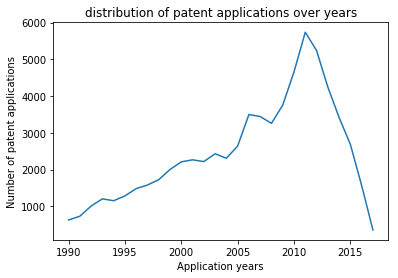

In [48]:
dist.plot()
plt.xlabel('Application years')
plt.ylabel('Number of patent applications')
plt.title('distribution of patent applications over years')
#plt.legend()
plt.show()

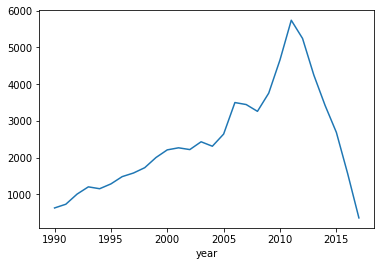

In [49]:
# We can always use groupby. Here we have two variables "year" and "granted"
p.groupby(p.year).granted.count().plot()

**The steep drop in patent applications in 2014 is due to the patent ﬁlling process at the USPTO, which involves a signiﬁcant time lag between the ﬁling and disclosure or registration of applications, ranging from several months to over two years.**

So work uptill fig 3 is done

### using plotly

In [50]:
value=p.year.value_counts().sort_index()

In [51]:
value_df=pd.DataFrame(data=value)

In [52]:
value_df.head()

,year
1990,631
1991,732
1992,1008
1993,1205
1994,1154


In [53]:
pyo.plot([{
    'x' : value_df.index,
    'y' : value_df[col],
    'name' : col
  

}for col in value_df.columns],filename='distribution.html')

'distribution.html'

In [54]:
traces=[go.Scatter(
    x=value_df.index,
    y=value_df[col],
    name= col



)for col in value_df.columns]

In [55]:
data=traces

In [56]:
layout=go.Layout(
title='Patent distribution over the year',
xaxis=dict(title='Application years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [57]:
figure1= go.Figure(data=data, layout=layout)

In [58]:
pyo.plot(figure1,filename='distribution2.html')

'distribution2.html'

# 2)-After Modeling

### 4a) Change in the number of patents 

In [59]:
data = pd.read_pickle('work_on_paper.pkl')

In [60]:
data.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6


In [61]:
data.Topic.value_counts()

topic4    16775
topic3    14176
topic6     9717
topic2     9127
topic8     8172
topic5     5822
topic7     3783
topic1     1190
Name: Topic, dtype: int64

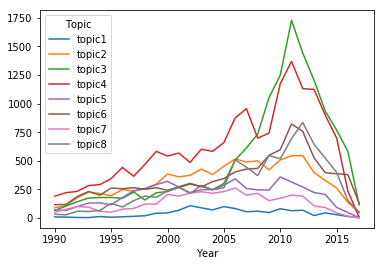

In [63]:
d=data
d=d.groupby(["Year","Topic"]).size()
d=d.unstack('Topic')
d.plot()

# Using plotly

In [64]:
d=data

In [66]:
d=d.groupby(["Year","Topic"]).size()

In [67]:
d.head()

Year    Topic 
1990.0  topic1     10
        topic2     91
        topic3     67
        topic4    191
        topic5     72
dtype: int64

In [68]:
df_patent=d.unstack('Topic')

In [69]:
type(df_patent)

pandas.core.frame.DataFrame

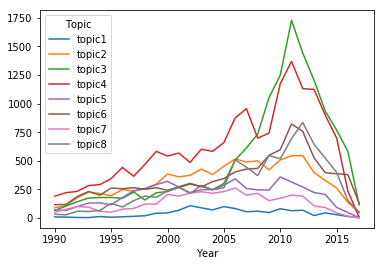

In [70]:
df_patent.plot()

In [71]:
df_patent2=df_patent.T

In [72]:
df_patent2

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,10,8,5,4,13,7,11,15,20,42,...,60,48,81,64,68,22,45,29,14,5
topic2,91,109,178,227,214,196,249,234,257,297,...,500,421,508,544,545,397,328,263,137,47
topic3,67,104,143,175,179,180,172,227,158,221,...,734,1052,1248,1729,1442,1204,934,769,582,115
topic4,191,222,233,284,292,345,442,365,469,583,...,698,742,1174,1369,1131,1125,897,700,236,7
topic5,72,66,101,131,132,116,179,239,257,292,...,246,245,360,315,271,223,206,93,48,3
topic6,117,119,188,232,199,262,256,265,251,265,...,434,548,597,822,758,526,396,387,380,129
topic7,50,76,100,95,59,51,77,84,122,122,...,216,152,173,200,191,106,91,45,17,1
topic8,33,28,60,57,66,128,97,152,192,181,...,371,546,518,694,836,644,523,400,154,52


In [73]:
traces=[go.Scatter(
    x=df_patent2.columns,
    y=df_patent2.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent2.index]

In [74]:
data=traces

In [75]:
layout=go.Layout(
title='Change in the number of patents over filling years',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [76]:
#layout=go.Layout(title='Change in the number of patents over filling years')

In [77]:
figure1= go.Figure(data=data, layout=layout)

In [78]:
pyo.plot(figure1,filename='Change in the number of patents.html')

'Change in the number of patents.html'

**Alternative way**

In [79]:
data = pd.read_pickle('work_on_paper.pkl')

In [81]:
f=data.groupby(data.Year).Topic.value_counts()

In [82]:
f=f.unstack('Topic')

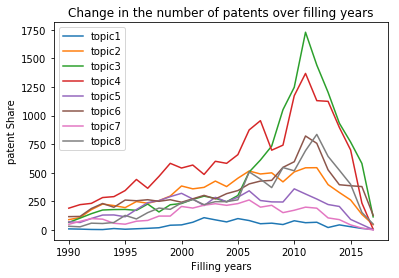

In [83]:
f.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the number of patents over filling years')
plt.legend()
plt.show()

**result of figure 4a**

### 4(b) Change in the share of patents over filing year

In [84]:
data.Topic.value_counts(normalize=True)

topic4    0.243957
topic3    0.206160
topic6    0.141314
topic2    0.132733
topic8    0.118845
topic5    0.084669
topic7    0.055016
topic1    0.017306
Name: Topic, dtype: float64

In [86]:
data.groupby(data.Year).Topic.value_counts(normalize=True)

Year    Topic 
1990.0  topic4    0.302694
        topic6    0.185420
        topic2    0.144216
        topic5    0.114105
        topic3    0.106181
        topic7    0.079239
        topic8    0.052298
        topic1    0.015848
1991.0  topic4    0.303279
        topic6    0.162568
        topic2    0.148907
        topic3    0.142077
        topic7    0.103825
        topic5    0.090164
        topic8    0.038251
        topic1    0.010929
1992.0  topic4    0.231151
        topic6    0.186508
        topic2    0.176587
        topic3    0.141865
        topic5    0.100198
        topic7    0.099206
        topic8    0.059524
        topic1    0.004960
1993.0  topic4    0.235685
        topic6    0.192531
        topic2    0.188382
        topic3    0.145228
        topic5    0.108714
        topic7    0.078838
                    ...   
2014.0  topic8    0.152924
        topic6    0.115789
        topic2    0.095906
        topic5    0.060234
        topic7    0.026608
        topic

In [87]:
c=data.groupby(data.Year).Topic.value_counts(normalize=True)

In [88]:
c=c.unstack('Topic')

In [89]:
c

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Year,,,,,,,,
1990.0,0.015848,0.144216,0.106181,0.302694,0.114105,0.185420,0.079239,0.052298
1991.0,0.010929,0.148907,0.142077,0.303279,0.090164,0.162568,0.103825,0.038251
1992.0,0.004960,0.176587,0.141865,0.231151,0.100198,0.186508,0.099206,0.059524
1993.0,0.003320,0.188382,0.145228,0.235685,0.108714,0.192531,0.078838,0.047303
1994.0,0.011265,0.185442,0.155113,0.253033,0.114385,0.172444,0.051127,0.057192
1995.0,0.005447,0.152529,0.140078,0.268482,0.090272,0.203891,0.039689,0.099611
1996.0,0.007417,0.167903,0.115981,0.298045,0.120701,0.172623,0.051922,0.065408
1997.0,0.009488,0.148008,0.143580,0.230867,0.151170,0.167615,0.053131,0.096142
1998.0,0.011587,0.148899,0.091541,0.271727,0.148899,0.145423,0.070684,0.111240


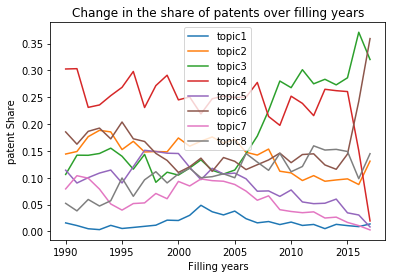

In [90]:
c.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

### Using plotly

In [91]:
df_patent=c.T

In [92]:
df_patent

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,
topic1,0.015848,0.010929,0.004960,0.003320,0.011265,0.005447,0.007417,0.009488,0.011587,0.020969,...,0.018411,0.012786,0.017386,0.011156,0.012972,0.005180,0.013158,0.010797,0.008929,0.013928
topic2,0.144216,0.148907,0.176587,0.188382,0.185442,0.152529,0.167903,0.148008,0.148899,0.148278,...,0.153421,0.112147,0.109036,0.094823,0.103968,0.093478,0.095906,0.097915,0.087372,0.130919
topic3,0.106181,0.142077,0.141865,0.145228,0.155113,0.140078,0.115981,0.143580,0.091541,0.110334,...,0.225222,0.280234,0.267869,0.301377,0.275086,0.283494,0.273099,0.286299,0.371173,0.320334
topic4,0.302694,0.303279,0.231151,0.235685,0.253033,0.268482,0.298045,0.230867,0.271727,0.291063,...,0.214176,0.197656,0.251985,0.238626,0.215757,0.264893,0.262281,0.260611,0.150510,0.019499
topic5,0.114105,0.090164,0.100198,0.108714,0.114385,0.090272,0.120701,0.151170,0.148899,0.145781,...,0.075483,0.065264,0.077270,0.054907,0.051698,0.052508,0.060234,0.034624,0.030612,0.008357
topic6,0.185420,0.162568,0.186508,0.192531,0.172444,0.203891,0.172623,0.167615,0.145423,0.132302,...,0.133170,0.145978,0.128139,0.143280,0.144601,0.123852,0.115789,0.144080,0.242347,0.359331
topic7,0.079239,0.103825,0.099206,0.078838,0.051127,0.039689,0.051922,0.053131,0.070684,0.060909,...,0.066278,0.040490,0.037132,0.034861,0.036436,0.024959,0.026608,0.016754,0.010842,0.002786
topic8,0.052298,0.038251,0.059524,0.047303,0.057192,0.099611,0.065408,0.096142,0.111240,0.090364,...,0.113839,0.145445,0.111183,0.120969,0.159481,0.151636,0.152924,0.148920,0.098214,0.144847


In [93]:
traces=[go.Scatter(
    x=df_patent.columns,
    y=df_patent.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent.index]

In [94]:
data=traces

In [95]:
layout=go.Layout(
title='Change in the share of patents over filing year',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [96]:
figure2= go.Figure(data=data, layout=layout)

In [97]:
pyo.plot(figure2,filename='patent_count_normalized.html')

'patent_count_normalized.html'

# Table 6: Major assignee by topic type

In [98]:
df=pd.read_pickle('work_on_paper.pkl')
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6


In [99]:
from collections import Counter
Counter(df.Topic)

Counter({'topic3': 14176,
         'topic6': 9717,
         'topic5': 5822,
         'topic2': 9127,
         'topic8': 8172,
         'topic4': 16775,
         'topic1': 1190,
         'topic7': 3783})

In [100]:
company=df.groupby(df.Topic).Assignee.value_counts(dropna=True, sort=True)

In [101]:
df_company = pd.DataFrame(company)
df_company

Assignee
Topic  Assignee                                                  
topic1 toyota motor corp                                      153
       honda motor co ltd                                      78
       nissan motor co ltd                                     62
       hyundai motor co ltd                                    50
       renault sas                                             23
       daewoo shipbuilding & marine engineering co ltd         14
       saudi arabian oil company                               14
       owens donald wade                                       11
       ford global technologies inc                            10
       hitachi ltd                                             10
       casio computer co ltd                                    9
       general motors corporation                               9
       nippon telegr & teleph corp <ntt>                        9
       denso corp                                               8
       the university of western ontario                        8
       matsushita electric industrial co ltd                    7
       mitsubishi heavy industries ltd                          7
       samsung sdi co ltd                                       7
       utc fuel cells llc                                       7
       bosch corp                                               6
       hno greenfuels inc                                       6
       mitsubishi heavy ind ltd                                 6
       stuart energy systems corporation                        6
       suzuki motor corp                                        6
       yamaha motor co ltd                                      6
       aleees eco ark co ltd                                    5
       mitsubishi motors corp                                   5
       n/c quest inc                                            5
       questair technologies inc                                5
       siemens aktiengesellschaft                               5
...                                                           ...
topic8 yoshikawa masato                                         1
       yoshimori junichi                                        1
       yu hai                                                   1
       yu xuelu                                                 1
       yurgil james r                                           1
       zakrytoe akcionernoe obschestvo 'combarco'               1
       zbynek bures                                             1
       zeng shengcai                                            1
       zf friedrichshafen kg                                    1
       zf sachs ag                                              1
       zf-batavia llc                                           1
       zhang mingliang                                          1
       zhang nan                                                1
       zhang qiushi                                             1
       zhang yuanqing                                           1
       zhanh chongxin                                           1
       zhao xingzhi                                             1
       zhejiang crrc electric vehicle co ltd                    1
       zhejiang xinchai co ltd                                  1
       zhejiang xingmei electric vehicle co ltd                 1
       zhengzhou zhongdian new energy automobile co ltd         1
       zhong shiqing                                            1
       zhong songfeng                                           1
       zhou lansheng                                            1
       zhu fumin                                                1
       zhuo honger                                              1
       zollner tobias                                           1
       zou deqiang                                              1
       zvekov aleksej nikolaevi

### For a specific topic listing wrt firms

In [102]:
topic_firm=df.groupby([df['Topic']=='topic1']).Assignee.value_counts(dropna=True, sort=True)

In [103]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
Topic Assignee                                
False toyota motor corp                   7972
      honda motor co ltd                  3899
      nissan motor co ltd                 2823
      bosch corp                          2764
      hyundai motor co ltd                2547
      ford global technologies inc        1803
      mitsubishi motors corp              1407
      denso corp                          1089
      renault sas                          836
      hitachi ltd                          749
      peugeot citroen automobiles          684
      suzuki motor corp                    522
      daimlerchrysler ag                   499
      general motors corporation           466
      yamaha motor co ltd                  460
      aisin aw co ltd                      454
      volkswagen group                     374
      continental automotive gmbh          316
      isuzu motors ltd                     299
      siemens aktiengesellschaft           280
      mazda motor corp                     272
      lsis co ltd                          253
      audi ag                              224
      bmw ag                               211
      general electric company             195
      hitachi automotive systems ltd       192
      fuji heavy ind ltd                   168
      hino motors ltd                      168
      daihatsu motor co ltd                155
      beiqi foton motor co ltd             137

In [104]:
d=df
d=d[d.Topic=="topic1"]

In [105]:
len(d)

1190

In [106]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
142,0.4453,"cell, planetary, hydrogen, stack, fuel, planet...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic1
144,0.4454,"cell, planetary, hydrogen, stack, fuel, planet...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic1
145,0.4397,"cell, planetary, hydrogen, stack, fuel, planet...",stuart energy systems corporation,1999.0,The present invention describes an energy dist...,topic1
147,0.4451,"cell, planetary, hydrogen, stack, fuel, planet...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic1
148,0.4454,"cell, planetary, hydrogen, stack, fuel, planet...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic1


In [107]:
d=d.groupby(['Assignee']).size()

In [108]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                                  153
honda motor co ltd                                  78
nissan motor co ltd                                 62
hyundai motor co ltd                                50
renault sas                                         23
saudi arabian oil company                           14
daewoo shipbuilding & marine engineering co ltd     14
owens donald wade                                   11
ford global technologies inc                        10
hitachi ltd                                         10
dtype: int64

**These are top 10 firms using Topic 1**

### For topic2

In [109]:
k=df
k=k[k.Topic=="topic2"]
len(k)

9127

In [110]:
k[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
11,0.6251,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh graz,2000.0,"A carburetor (14), preferably a slide valve ty...",topic2
12,0.8208,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,PROBLEM TO BE SOLVED: To improve quality of ex...,topic2
13,0.8197,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,PURPOSE: A four cycle engine is provided to im...,topic2
14,0.8357,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,The invention relates to a four-stroke interna...,topic2
15,0.8333,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,A four-stroke internal combustion engine with ...,topic2


In [111]:
k=k.groupby(['Assignee']).size()
k.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               506
honda motor co ltd              450
bosch corp                      381
hyundai motor co ltd            298
renault sas                     230
nissan motor co ltd             187
ford global technologies inc    171
suzuki motor corp               127
daimlerchrysler ag              120
peugeot citroen automobiles     120
dtype: int64

### Topic3

In [112]:
e=df
e=e[e.Topic=="topic3"]
len(e)

14176

In [113]:
e[:2]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3


In [114]:
e=e.groupby(['Assignee']).size()
e.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               961
honda motor co ltd              568
hyundai motor co ltd            462
mitsubishi motors corp          331
nissan motor co ltd             267
ford global technologies inc    239
bosch corp                      226
lsis co ltd                     222
hitachi ltd                     160
denso corp                      155
dtype: int64

### Topic 4

In [115]:
f=df
f=f[f.Topic=="topic4"]
len(f)

16775

In [116]:
f=f.groupby(['Assignee']).size()
f.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               4038
honda motor co ltd              1411
nissan motor co ltd             1255
hyundai motor co ltd             867
mitsubishi motors corp           628
bosch corp                       622
ford global technologies inc     571
denso corp                       542
hitachi ltd                      276
suzuki motor corp                193
dtype: int64

### Topic 5

In [117]:
g=df
g=g[g.Topic=="topic5"]
len(g)

5822

In [118]:
g=g.groupby(['Assignee']).size()
g.sort_values(ascending=False)[:10]

Assignee
bosch corp                      929
toyota motor corp               516
nissan motor co ltd             196
ford global technologies inc    192
continental automotive gmbh     156
honda motor co ltd              120
denso corp                      119
renault sas                     108
daimlerchrysler ag              104
peugeot citroen automobiles     103
dtype: int64

### Topic 6

In [119]:
h=df
h=h[h.Topic=="topic6"]
len(h)

9717

In [120]:
h=h.groupby(['Assignee']).size()
h.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd              822
toyota motor corp               385
bosch corp                      311
nissan motor co ltd             214
yamaha motor co ltd             185
mitsubishi motors corp          129
hyundai motor co ltd            125
suzuki motor corp               117
ford global technologies inc     93
renault sas                      93
dtype: int64

### Topic 7

In [121]:
i=df
i=i[i.Topic=="topic7"]
len(i)

3783

In [122]:
i=i.groupby(['Assignee']).size()
i.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               518
nissan motor co ltd             132
bosch corp                      102
honda motor co ltd               83
peugeot citroen automobiles      81
renault sas                      75
isuzu motors ltd                 70
ford global technologies inc     58
volkswagen group                 57
samsung sdi co ltd               46
dtype: int64

### Topic 8

In [123]:
j=df
j=j[j.Topic=="topic8"]
len(j)

8172

In [124]:
j=j.groupby(['Assignee']).size()
j.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               1048
hyundai motor co ltd             731
nissan motor co ltd              572
ford global technologies inc     479
honda motor co ltd               445
bosch corp                       193
aisin aw co ltd                  178
mitsubishi motors corp           134
peugeot citroen automobiles       90
general motors corporation        78
dtype: int64

### Using crosstab

showing each assignee and what is topic contribution in that

In [125]:
# top assignee

df.Assignee.value_counts()[:20]

toyota motor corp               8125
honda motor co ltd              3977
nissan motor co ltd             2885
bosch corp                      2770
hyundai motor co ltd            2597
ford global technologies inc    1813
mitsubishi motors corp          1412
denso corp                      1097
renault sas                      859
hitachi ltd                      759
peugeot citroen automobiles      688
suzuki motor corp                528
daimlerchrysler ag               503
general motors corporation       475
yamaha motor co ltd              466
aisin aw co ltd                  458
volkswagen group                 375
continental automotive gmbh      316
isuzu motors ltd                 300
siemens aktiengesellschaft       285
Name: Assignee, dtype: int64

In [126]:
w=df
w=w[w.Assignee=="toyota motor corp"]
w[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
4307,0.4676,"catalyst, exhaust, parking, gas, electrode, in...",toyota motor corp,2002.0,An internal combustion engine of a vehicle is ...,topic7
5149,0.4212,"cool, air, water, fuel, gas, heat, oil, pipe, ...",toyota motor corp,1991.0,PURPOSE:To prevent deteriorated fuel atomizati...,topic2
5156,0.4518,"torque, speed, value, control, mode, travel, s...",toyota motor corp,1997.0,PROBLEM TO BE SOLVED: To provide a power gener...,topic4
5157,0.5457,"cool, air, water, fuel, gas, heat, oil, pipe, ...",toyota motor corp,1995.0,PURPOSE: To reduce ventilation resistance of a...,topic2
5158,0.6581,"cool, air, water, fuel, gas, heat, oil, pipe, ...",toyota motor corp,1995.0,A fuel vapor treating apparatus for an engine ...,topic2


In [127]:
len(w)

8125

In [128]:
pd.crosstab(df.Assignee=="toyota motor corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,1037,8621,13215,12737,5306,9332,3265,7124
True,153,506,961,4038,516,385,518,1048


**We can use %age as well to show how much a topic has contributed to Toyota Motors' innovation profile**

In [129]:
pd.crosstab(df.Assignee=="bosch corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,1184,8746,13950,16153,4893,9406,3681,7979
True,6,381,226,622,929,311,102,193


# 3)-Share of patents by  technological topics

table 3 in paper

- As we have decline after 2011. It had highest patents i.e 5737. So we shall take it as base year for current patent share.

- For CAGR, we will use 2009-2013. This is to represent patent sample in a symmetric way.

In [130]:
df = pd.read_pickle('work_on_paper.pkl')

In [131]:
df.shape

(68762, 6)

In [132]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6


In [134]:
# How many patents we had in year 2011
len(df[df.Year==2011])

5737

In [135]:
# start with 2011 as of base year
df.groupby(df.Year==2011).Topic.value_counts()

Year   Topic 
False  topic4    15406
       topic3    12447
       topic6     8895
       topic2     8583
       topic8     7478
       topic5     5507
       topic7     3583
       topic1     1126
True   topic3     1729
       topic4     1369
       topic6      822
       topic8      694
       topic2      544
       topic5      315
       topic7      200
       topic1       64
Name: Topic, dtype: int64

5737 for 2011<br>
5737/68762=8.34 %

### for patent share

In [137]:
df.groupby(df.Year==2011).Topic.value_counts(normalize=True)

Year   Topic 
False  topic4    0.244443
       topic3    0.197493
       topic6    0.141134
       topic2    0.136184
       topic8    0.118651
       topic5    0.087378
       topic7    0.056850
       topic1    0.017866
True   topic3    0.301377
       topic4    0.238626
       topic6    0.143280
       topic8    0.120969
       topic2    0.094823
       topic5    0.054907
       topic7    0.034861
       topic1    0.011156
Name: Topic, dtype: float64

In [140]:
df.groupby(df.Year==2011).Topic.count()

Year
False    63025
True      5737
Name: Topic, dtype: int64

**Total patents in 2011 are 5737**

- Let's varify : 

topic1= 64/5737= 0.011 Correct

### Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2009-2013

In [141]:
len(df[df.Year== 2009])

3754

In [142]:
df.groupby(df.Year==2009).Topic.value_counts(sort=False)

Year   Topic 
False  topic1     1142
       topic2     8706
       topic3    13124
       topic4    16033
       topic5     5577
       topic6     9169
       topic7     3631
       topic8     7626
True   topic1       48
       topic2      421
       topic3     1052
       topic4      742
       topic5      245
       topic6      548
       topic7      152
       topic8      546
Name: Topic, dtype: int64

Initial values for patent share are given 

**For 2013**

In [143]:
len(df[df.Year== 2013])

4247

In [144]:
df.groupby(df.Year==2013).Topic.value_counts(sort=False)

Year   Topic 
False  topic1     1168
       topic2     8730
       topic3    12972
       topic4    15650
       topic5     5599
       topic6     9191
       topic7     3677
       topic8     7528
True   topic1       22
       topic2      397
       topic3     1204
       topic4     1125
       topic5      223
       topic6      526
       topic7      106
       topic8      644
Name: Topic, dtype: int64

# 4)-Adding topic types as per topic

Table 6: Major assignee by topic type

In [145]:
df = pd.read_pickle('work_on_paper.pkl')

In [146]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6


### a)Adding 4 main tech types to dataframe
emerging, saturated, decline,dominant

In [153]:
df['tech_type']=df.Topic.map({'topic3':'emerging', 'topic1':'dominant', 'topic2': 'dominant', 'topic7':'dominant','topic0':'decline', 'topic4':'decline','topic5': 'decline', 'topic6':'saturate'})

In [154]:
df.tech_type.value_counts()

decline     22597
emerging    14176
dominant    14100
saturate     9717
Name: tech_type, dtype: int64

In [158]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3,emerging
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3,emerging
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6,saturate
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6,saturate
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6,saturate


In [155]:
df.to_pickle('tech_type_per_topic.pkl')

### b)- Wordcloud key words in all tech-topics

# 5- Figure 6. Major assignees by topic types. 

Adding technology types

In [166]:
from collections import Counter
Counter(df.tech_type)

Counter({'emerging': 14176,
         'saturate': 9717,
         'decline': 22597,
         'dominant': 14100,
         nan: 8172})

In [167]:
company=df.groupby(df.tech_type).Assignee.value_counts(dropna=True, sort=True)

In [168]:
df_company = pd.DataFrame(company)
df_company

Assignee
tech_type Assignee                                                    
decline   toyota motor corp                                       4554
          bosch corp                                              1551
          honda motor co ltd                                      1531
          nissan motor co ltd                                     1451
          hyundai motor co ltd                                     901
          ford global technologies inc                             763
          mitsubishi motors corp                                   714
          denso corp                                               661
          hitachi ltd                                              344
          renault sas                                              289
          peugeot citroen automobiles                              242
          continental automotive gmbh                              213
          suzuki motor corp                                        198
          daimlerchrysler ag                                       183
          mazda motor corp                                         172
          aisin aw co ltd                                          171
          general motors corporation                               163
          isuzu motors ltd                                         160
          volkswagen group                                         158
          siemens aktiengesellschaft                               121
          hino motors ltd                                          111
          yamaha motor co ltd                                      107
          hitachi automotive systems ltd                            98
          daihatsu motor co ltd                                     80
          audi ag                                                   79
          ntn corporation                                           78
          bmw ag                                                    71
          fuji heavy ind ltd                                        67
          jaguar land rover limited                                 67
          jatco ltd                                                 59
...                                                                ...
saturate  zhongyu science & technology co ltd                        1
          zhou dengrong                                              1
          zhou guangrong                                             1
          zhou jie                                                   1
          zhou julong                                                1
          zhou qing                                                  1
          zhou weibo                                                 1
          zhou xuzhou                                                1
          zhou; shijian                                              1
          zhu fuyuan                                                 1
          zhu jiang                                                  1
          zhu jingxiang                                              1
          zhu linbo                                                  1
          zhu mingzhong                                              1
          zhu ziming                                                 1
          zhuang sen                                                 1
          zhucheng new oriental auto meters co ltd                   1
          zhuhai e-way electrical vehicle co ltd                     1
          zhuhai yintong aviation supplies coltd                     1
          zhuzhou electric rolling stock plant                       1
          zibo diesel engine parent company                          1
          zips alf                                                   1
          zodiac international                                       1
          zoomlion environmental sanitation machinery com...         1
          zooml

### For a specific "tech_type" listing wrt firms

In [171]:
topic_firm=df.groupby([df['tech_type']=='decline']).Assignee.value_counts(dropna=True, sort=True)

In [172]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:30]

Assignee
tech_type Assignee                                                    
False     toyota motor corp                                       3571
          honda motor co ltd                                      2446
          hyundai motor co ltd                                    1696
          nissan motor co ltd                                     1434
          bosch corp                                              1219
          ford global technologies inc                            1050
          mitsubishi motors corp                                   698
          renault sas                                              570
          peugeot citroen automobiles                              446
          denso corp                                               436
          hitachi ltd                                              415
          yamaha motor co ltd                                      359
          suzuki motor corp                                        330
          daimlerchrysler ag                                       320
          general motors corporation                               312
          aisin aw co ltd                                          287
          lsis co ltd                                              243
          volkswagen group                                         217
          general electric company                                 182
          siemens aktiengesellschaft                               164
          audi ag                                                  147
          bmw ag                                                   141
          isuzu motors ltd                                         140
          sony corporation                                         129
          beiqi foton motor co ltd                                 115
          korea advanced institute of science and technology       112
          mahle international gmbh                                 110
          continental automotive gmbh                              103
          mazda motor corp                                         102
          fuji heavy ind ltd                                       101

### for decline

In [173]:
d=df
d=d[d.tech_type=="decline"]

In [174]:
len(d)

22597

In [175]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
9,0.8510,"injection, fuel, valve, cylinder, pressure, co...",avl list gmbh,1998.0,In an internal combustion engine with at least...,topic5,decline
10,0.5929,"injection, fuel, valve, cylinder, pressure, co...",steyr nutzfahrzeuge ag,1993.0,The invention relates to an engine brake in a ...,topic5,decline
18,0.7700,"injection, fuel, valve, cylinder, pressure, co...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5,decline
21,0.6863,"injection, fuel, valve, cylinder, pressure, co...",avl list gmbh,2000.0,The method involves determining the oil supply...,topic5,decline
34,0.4710,"injection, fuel, valve, cylinder, pressure, co...",avl list gmbh,2001.0,Process for the controlled operation of a comb...,topic5,decline


In [176]:
d=d.groupby(['Assignee']).size()

In [177]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               4554
bosch corp                      1551
honda motor co ltd              1531
nissan motor co ltd             1451
hyundai motor co ltd             901
ford global technologies inc     763
mitsubishi motors corp           714
denso corp                       661
hitachi ltd                      344
renault sas                      289
dtype: int64

**These are top 10 firms using declined technology. We know that decline technology belongs to topic0 and topic4 so, we can create figure from this information**

### for emerging

In [181]:
e=df
e=e[e.tech_type=="emerging"]

In [182]:
len(e)

14176

In [183]:
e[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
0,0.8586,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3,emerging
1,0.8034,"charge, battery, power, voltage, electric, mod...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic3,emerging
35,0.4470,"charge, battery, power, voltage, electric, mod...",avl list gmbh,2001.0,<P>PROBLEM TO BE SOLVED: To provide a simple m...,topic3,emerging
47,0.8551,"charge, battery, power, voltage, electric, mod...",steyr-daimler-puch ag wien at,1994.0,The regulating circuit has a microprocessor re...,topic3,emerging
50,0.8136,"charge, battery, power, voltage, electric, mod...",steyr-daimler-puch aktiengesellschaft,1991.0,A control circuit having a controller provided...,topic3,emerging


In [184]:
e=e.groupby(['Assignee']).size()

In [185]:
e.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               961
honda motor co ltd              568
hyundai motor co ltd            462
mitsubishi motors corp          331
nissan motor co ltd             267
ford global technologies inc    239
bosch corp                      226
lsis co ltd                     222
hitachi ltd                     160
denso corp                      155
dtype: int64

**These are top 10 firms using emerging technology. We know that emerging technology belongs to topic3 so, we can create figure from this information.**

### for dominant

In [186]:
f=df
f=f[f.tech_type=="dominant"]

In [187]:
len(f)

14100

In [188]:
f[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
11,0.6251,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh graz,2000.0,"A carburetor (14), preferably a slide valve ty...",topic2,dominant
12,0.8208,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,PROBLEM TO BE SOLVED: To improve quality of ex...,topic2,dominant
13,0.8197,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,PURPOSE: A four cycle engine is provided to im...,topic2,dominant
14,0.8357,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,The invention relates to a four-stroke interna...,topic2,dominant
15,0.8333,"cool, air, water, fuel, gas, heat, oil, pipe, ...",avl list gmbh,2000.0,A four-stroke internal combustion engine with ...,topic2,dominant


In [189]:
f=f.groupby(['Assignee']).size()

In [190]:
f.sort_values(ascending=False)[:10]

Assignee
toyota motor corp               1177
honda motor co ltd               611
bosch corp                       489
nissan motor co ltd              381
hyundai motor co ltd             378
renault sas                      328
ford global technologies inc     239
peugeot citroen automobiles      205
daimlerchrysler ag               169
suzuki motor corp                134
dtype: int64

**These are top 10 firms using dominant technology. We know that dominant technology belongs to topic1,2 and 7 so, we can create figure from this information.**

### for sature technology

In [191]:
s=df
s=s[s.tech_type=="saturate"]

In [192]:
len(s)

9717

In [193]:
s[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,tech_type
2,0.3665,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,An object is to provide a particulate trap for...,topic6,saturate
3,0.5438,"body, side, utility, end, model, support, part...",sumitomo electric ind ltd,1995.0,PURPOSE: To obtain a trap by which the leakage...,topic6,saturate
4,0.3044,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,A particulate trap for a diesel engine designe...,topic6,saturate
5,0.3454,"body, side, utility, end, model, support, part...",sumitomo electric industries ltd,1995.0,"PCT No. PCT/JP96/02405 Sec. 371 Date Nov. 17, ...",topic6,saturate
6,0.7500,"body, side, utility, end, model, support, part...",ricardo cayetano algeri,2000.0,A MIXING DEVICE OF GAS FUEL WITH AIR FOR INTER...,topic6,saturate


In [194]:
s=s.groupby(['Assignee']).size()

In [195]:
s.sort_values(ascending=False)[:10]

Assignee
honda motor co ltd              822
toyota motor corp               385
bosch corp                      311
nissan motor co ltd             214
yamaha motor co ltd             185
mitsubishi motors corp          129
hyundai motor co ltd            125
suzuki motor corp               117
ford global technologies inc     93
renault sas                      93
dtype: int64

**These are top 10 firms using saturate technology. We know that saturate technology belongs to topic 6 so, we can create figure from this information**

# 6)- Adding Ecosystem components with each topic

### End of notebook5